# Employee Atrition

For a company, when you talk about employee churn, that can bring some great issues, like losing potential talents, losing experienced employees that could help with the company's growth, scare away potential new employees due to them seeing an amount of people dropping from the company, feeding them a fear that the company might not have a good work environment, and other more.

Therefore, it is really important to understand:
- Why are the employees dropping from the company?
- What are factors that are the most related to employee churn?
- The churn is ocurring in all partitions of the company or is just one or a specific few?
- What could be leading to this behavior?

In this small project, I am going to be analyzing a employee attrition dataset, downloaded from Kaggle (https://www.kaggle.com/datasets/patelprashant/employee-attrition), in order to gather insights about the behavior of the employee churn and develop a classification model that, once it receives input about an employee, it can predict if they will likely drop from the company or not.

In [61]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import make_scorer, recall_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the dataset

data = pd.read_csv('data/WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head(15)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [3]:
# Checking information about each column

columns = list(data.columns)

for column in columns:
    print(f'Info about {column} column:')
    print(data[column].value_counts().sort_values())
    print('=' * 80)

Info about Age column:
57     4
60     5
18     8
19     9
59    10
20    11
21    13
58    14
23    14
56    14
22    16
54    18
52    18
48    19
53    19
51    19
55    22
47    24
49    24
24    26
25    26
50    30
43    32
46    33
44    33
26    39
41    40
45    41
39    42
42    46
28    48
27    48
37    50
40    57
33    58
38    58
30    60
32    61
29    68
31    69
36    69
34    77
35    78
Name: Age, dtype: int64
Info about Attrition column:
Yes     237
No     1233
Name: Attrition, dtype: int64
Info about BusinessTravel column:
Non-Travel            150
Travel_Frequently     277
Travel_Rarely        1043
Name: BusinessTravel, dtype: int64
Info about DailyRate column:
1429    1
369     1
552     1
943     1
206     1
       ..
1082    5
1329    5
530     5
408     5
691     6
Name: DailyRate, Length: 886, dtype: int64
Info about Department column:
Human Resources            63
Sales                     446
Research & Development    961
Name: Department, dtype: int64
Inf

#### From the information extracted, it's possible to notice that the following columns do not bring any useful information for the goal of the analysis:
  - EmployeeCount;
  - EmployeeNumber;
  - Over18;
  - StandardHours;

#### They do not bring any useful information because they either contain the same value for all the rows of the dataset or they represent a type of unique identification column, therefore they will be dropped from the dataset.

In [4]:
# Dropping columns that will not be used

data = data.drop(['EmployeeCount', 'EmployeeNumber',
                  'Over18', 'StandardHours'], axis=1)

data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


It is also really important to check whether there is duplicated data and missing data, as they can be an impass for the future analysis

In [5]:
# Checking the dataframe's info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [6]:
# Checking duplicated data

data[data.duplicated()]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


As it is noticeable from the analysis above, there is neither missing data nor duplicated data. That is actually a rare case, because it is really common to find data that is missing or that is duplicated.

If there was actually duplicated or missing data, to decide what to do, it would depend on the amount of these kind of data that are present. For example, if there is a few of them, we can just drop them from the dataset and that would not impact negatively the analysis. If there are a lot of missing data, inputing them with the mean, median, previous values, or some other kind of data - which would depend on the kind of data that is missing - would be sufficient to keep going with the analysis. However, if there are a lot of duplicated data, that could represent some kind of problem at the data collecting phase, which would be necessary a specific analysis for this case.

Let's start the analysis with understanding how the data is related to the attrition, first brainstorming how the attrition could be affected by the variable and then checking the actual behavior and then taking conclusions about it.

Before the actual analysis, it is possible to notice that there are some columns that have numerical data but are actually categorical data, like the columns **Education** and **EnvironmentSatisfaction**, so I am going to create new columns with the corresponding categorical values so the undesrtading can be clearer.

The changes are available at the dataset link, and will be the following:

- **Education**:
  - 1: "Below College"
  - 2: "College"
  - 3: "Bachelor"
  - 4: "Master"
  - 5: "Doctor"
    
- **EnvironmentSatisfaction**:
  - 1: "Low"
  - 2: "Medium"
  - 3: "High"
  - 4: "Very High"

- **JobInvolvement**:
  - 1: "Low"
  - 2: "Medium"
  - 3: "High"
  - 4: "Very High"

- **JobSatisfaction**:
  - 1: "Low"
  - 2: "Medium"
  - 3: "High"
  - 4: "Very High"

- **PerformanceRating**:
  - 1: "Low"
  - 2: "Good"
  - 3: "Excellent"
  - 4: "Outstanding"

- **RelationshipSatisfaction**:
  - 1: "Low"
  - 2: "Medium"
  - 3: "High"
  - 4: "Very High"

- **WorkLifeBalance**:
  - 1: "Bad"
  - 2: "Good"
  - 3: "Better"
  - 4: "Best"

In [7]:
# Defining the dictionaries with the values correpondence
education_dict = {
    1: "Below college",
    2: "College",
    3: "Bachelor",
    4: "Master",
    5: "Doctor"
}

environment_satisfaction_dict = {
    1: "Low",
    2: "Medium",
    3: "High",
    4: "Very High"
}

job_involvement_dict = {
    1: "Low",
    2: "Medium",
    3: "High",
    4: "Very High"
}

job_satisfaction_dict = {
    1: "Low",
    2: "Medium",
    3: "High",
    4: "Very High"
}

performance_rating_dict = {
    1: "Low",
    2: "Good",
    3: "Excellent",
    4: "Outstanding"
}

relationship_satisfaction_dict = {
    1: "Low",
    2: "Medium",
    3: "High",
    4: "Very High"
}

worklife_balace_dict = {
    1: "Bad",
    2: "Good",
    3: "Better",
    4: "Best"
}


# Creating new columns for the categorical columns with numerical values

data['EducationLabel'] = data['Education'].map(education_dict)
data['EnvironmentSatisfactionLabel'] = data['EnvironmentSatisfaction'].map(
    environment_satisfaction_dict)
data['JobInvolvementLabel'] = data['JobInvolvement'].map(job_involvement_dict)
data['JobSatisfactionLabel'] = data['JobSatisfaction'].map(
    job_satisfaction_dict)
data['PerformanceRatingLabel'] = data['PerformanceRating'].map(
    performance_rating_dict)
data['RelationshipSatisfactionLabel'] = data['RelationshipSatisfaction'].map(
    relationship_satisfaction_dict)
data['WorkLifeBalanceLabel'] = data['WorkLifeBalance'].map(
    worklife_balace_dict)

In [8]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EducationLabel,EnvironmentSatisfactionLabel,JobInvolvementLabel,JobSatisfactionLabel,PerformanceRatingLabel,RelationshipSatisfactionLabel,WorkLifeBalanceLabel
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,4,0,5,College,Medium,High,Very High,Excellent,Low,Bad
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,7,1,7,Below college,High,Medium,Medium,Outstanding,Very High,Better
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,0,0,0,College,Very High,Medium,High,Excellent,Medium,Better
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,7,3,0,Master,Very High,High,High,Excellent,High,Better
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,2,2,2,Below college,Low,High,Medium,Excellent,Very High,Better
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,2,0,3,College,High,Very High,Very High,Excellent,High,Better
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,7,1,7,Below college,Very High,Medium,Low,Excellent,Low,Better
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,2,0,3,Bachelor,Medium,Very High,Medium,Outstanding,Medium,Better
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,6,0,8,Bachelor,Very High,Medium,Medium,Excellent,Very High,Good


# Analyzing Categorical columns

In [9]:
def get_perc_data(df, column):
    '''
    Function to generate a dataframe with
    the proportion of the values of a column
    taking into account the 'Attrition' column

    Inputs:
        df -> dataframe with the informationto be used
        column -> column to be found proportions

    Output:
        count -> final dataframe with the proportions information
    '''

    # Count total of churn and not-churn for each value of 'Businesstravel'
    count = df.groupby([column, 'Attrition']).size().reset_index(name='Count')

    # Calculating the total for each value of 'BusinessTravel'
    total = df.groupby(column).size().reset_index(name='Total')

    # Merging both dataframes to get the total for each category
    count = count.merge(total, on=column)

    # Calculating proportion
    count['Percentage'] = (count['Count'] / count['Total']) * 100

    return count

## **BusinessTravel**

Starting with the analysis of the relatioship between attrition and the frequency of traveling for business, we can think that, at the same time that there are people that, due to taking a lot of business travels, would want to go to another company because they want to spend more time at home with their family, there are others that are looking exactly for business travels and this kind of work dynamic, but it depends on the kind of company and kind of work that is done.

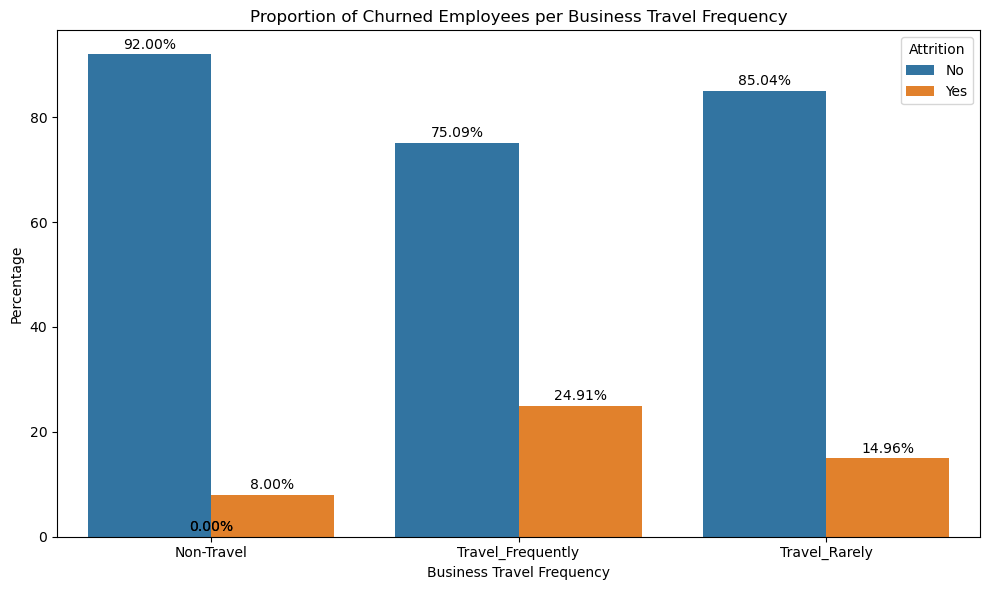

In [10]:
# Getting the percentage data
business_travel_perc = get_perc_data(data, 'BusinessTravel')

# # Plotting the frequency of each value for the churned employees using Plotly
# fig = px.bar(
#     business_travel_perc,
#     x='BusinessTravel',
#     y='Count',
#     color='Attrition',
#     text='Percentage',
#     hover_data={'Percentage': ':.2f'}
# ).update_layout(
#     title={
#         'text': 'Proprtion of Churned Employees per Business Travel Frequency',
#         'y': 0.9,
#         'x': 0.5,
#         'xanchor': 'center',
#         'yanchor': 'top'
#     },
#     yaxis_title='Count',
#     xaxis_title='BusinessTravel'
# ).update_traces(
#     texttemplate='%{text:.2f}%',
# )

# fig.show()

# Plotting the frequency of each value for the churned employees using seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='BusinessTravel',
    y='Percentage',
    hue='Attrition',
    data=business_travel_perc
)

# Add percentage labels to the bars
for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = height + 0.5  # Adjust vertical position of label
    ax.text(x, y, f'{height:.2f}%', ha='center', va='bottom')

# Set title and labels
plt.title('Proportion of Churned Employees per Business Travel Frequency')
plt.xlabel('Business Travel Frequency')
plt.ylabel('Percentage')
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()

From the figure above, it is possible to notice that the high frequency of business travels impacts negatively if an employee is going to stay or not in the company, that is, if the employee travels frequently, it is likely that they will drop from the company.

## Department 

Now it is time to analyze wheter the department in which the employee works affects the chances of churning. The department can really affect if someone is going to stay or not in a company, may be it due to the kind of work that is done, or the amount of work that is done, or another factor like the relationship with colleagues from the same department.

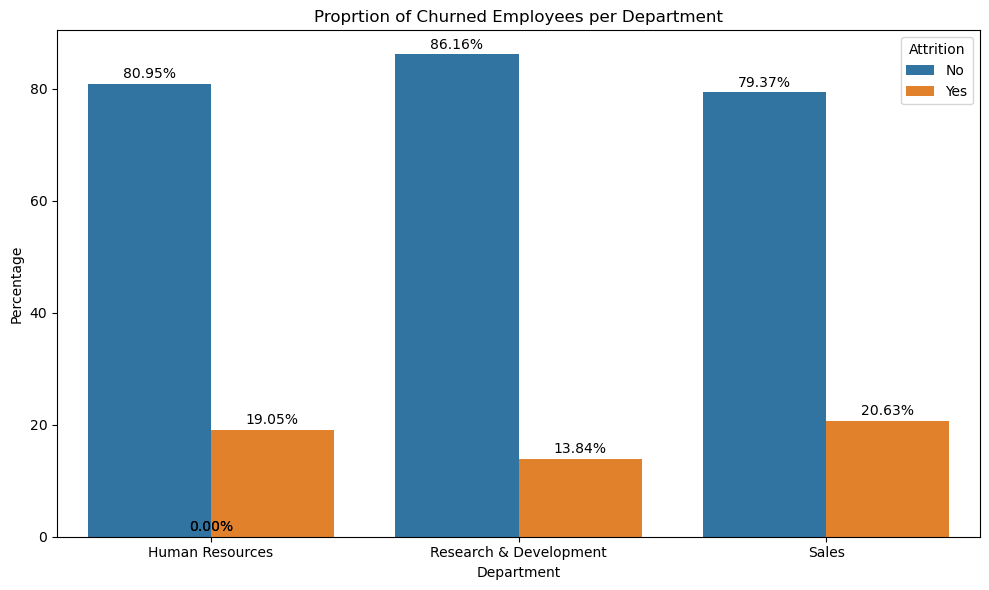

In [11]:
# Getting the percentage data
department_perc = get_perc_data(data, 'Department')

# # Plotting the frequency of each value for the churned employees using Plotly
# fig = px.bar(
#     department_perc,
#     x='Department',
#     y='Count',
#     color='Attrition',
#     text='Percentage',
#     hover_data={'Percentage': ':.2f'}
# ).update_layout(
#     title={
#         'text': 'Proprtion of Churned Employees per Department',
#         'y': 0.9,
#         'x': 0.5,
#         'xanchor': 'center',
#         'yanchor': 'top'
#     },
#     yaxis_title='Count',
#     xaxis_title='Department'
# ).update_traces(
#     texttemplate='%{text:.2f}%',
# )

# fig.show()

# Plotting the frequency of each value for the churned employees using seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='Department',
    y='Percentage',
    hue='Attrition',
    data=department_perc
)

# Add percentage labels to the bars
for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = height + 0.5  # Adjust vertical position of label
    ax.text(x, y, f'{height:.2f}%', ha='center', va='bottom')

# Set title and labels
plt.title('Proprtion of Churned Employees per Department')
plt.xlabel('Department')
plt.ylabel('Percentage')
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()

As we can see, there is a considerable difference between the Research & Development department and the other two. An employee from the Human Resources or Sales departments are more likely to churn. Considering the kind of department, this behavior could highly be related to relationship between colleagues or even with the department's boss, also, as stated before, it could be due to kind and/or amount of work done at these departments. A checking will be done later in order to check if this is actually true or if there is some other reason behind it.

## Education

Does the level of education influence if en employee is going to drop from the company? It is reasonable to think that two cenarios could occur:

  - Employees with low-level graduation are dropping due to either getting better opportunities at other companies, not identifying themselves with the work and therefore seeking for new environments to find themselves or either develop themselves, or not being qualified enough to stay on the current one;
  - Employees with high-level graduation are dropping due to the need of doing new things, receving better opportunities at other companies, be that opportunities: higher salary, less work hours, closer workplace from home, and other factors;

Let us check out how is the behavior of the data we have.

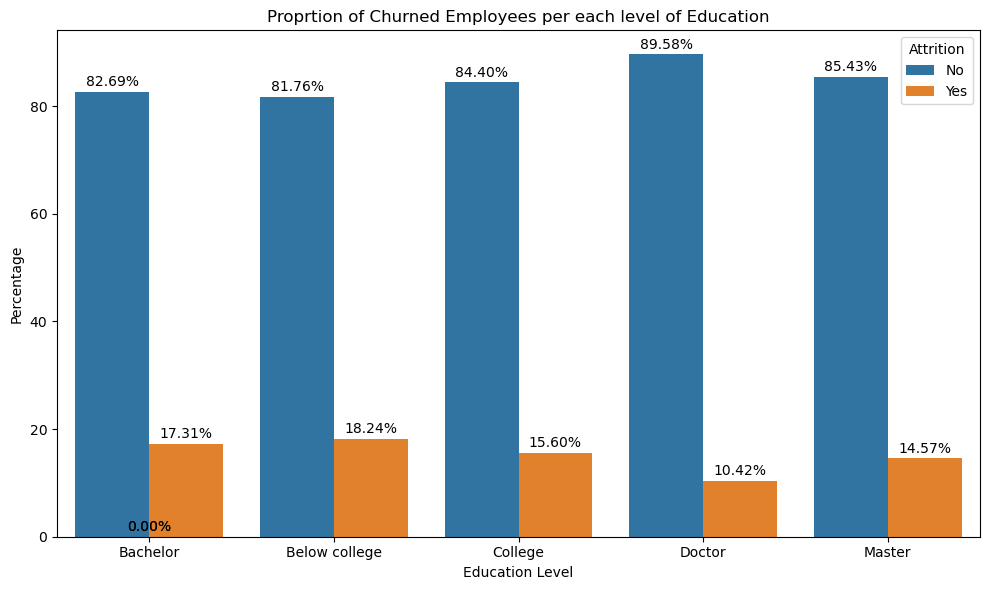

In [12]:
# Getting the percentage data
education_perc = get_perc_data(data, 'EducationLabel')

# # Plotting the frequency of each value for the churned employees using Plotly
# fig = px.bar(
#     education_perc,
#     x='EducationLabel',
#     y='Count',
#     color='Attrition',
#     text='Percentage',
#     hover_data={'Percentage': ':.2f'}
# ).update_layout(
#     title={
#         'text': 'Proprtion of Churned Employees per each level of Education',
#     },
#     yaxis_title='Count',
#     xaxis_title='Education Level'
# ).update_traces(
#     texttemplate='%{text:.2f}%',
# )

# fig.show()

# Plotting the frequency of each value for the churned employees using seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='EducationLabel',
    y='Percentage',
    hue='Attrition',
    data=education_perc
)

# Add percentage labels to the bars
for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = height + 0.5  # Adjust vertical position of label
    ax.text(x, y, f'{height:.2f}%', ha='center', va='bottom')

# Set title and labels
plt.title('Proprtion of Churned Employees per each level of Education')
plt.xlabel('Education Level')
plt.ylabel('Percentage')
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()

We can notice that, in general, the higher the education level, the less likely it is for the employee to churn. Even though for the Bachelor level the churn rate is higher than the College level, the rule applies, where we can see that masters and doctors are likely to stay in the company, and those that are still in College or do not have gone to college and more likely to churn. For the Bellow College case, it could be due to rotativity, like an intern program. For the Bachelor case, it could be due to new opportunities being found at other companies or workers that could not reach an acceptable level of work, and therefore are not on the company anymore, which should be looked into in more detail.

## Education Field

Does the kind of education field the employee graduated/is graduating influence on whether they are droping from the company at some point ? The education field is highly related to the department because of the kind of work each department demands from the employee. For example, it is reasonable to assume that someone that graduated on a field of *Life Sciences* to work at the Research department or things related, if you are talking about biology as the kind of life science,it is also reasonable to say that  someone that graduated on a Maketing field works at the Sales department.

Therefore, let us first check all the kinds of Eduaction Field values possible and then check whether they have any influence on our target: employee churn.

In [13]:
# Checking all possible values for education field

data['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

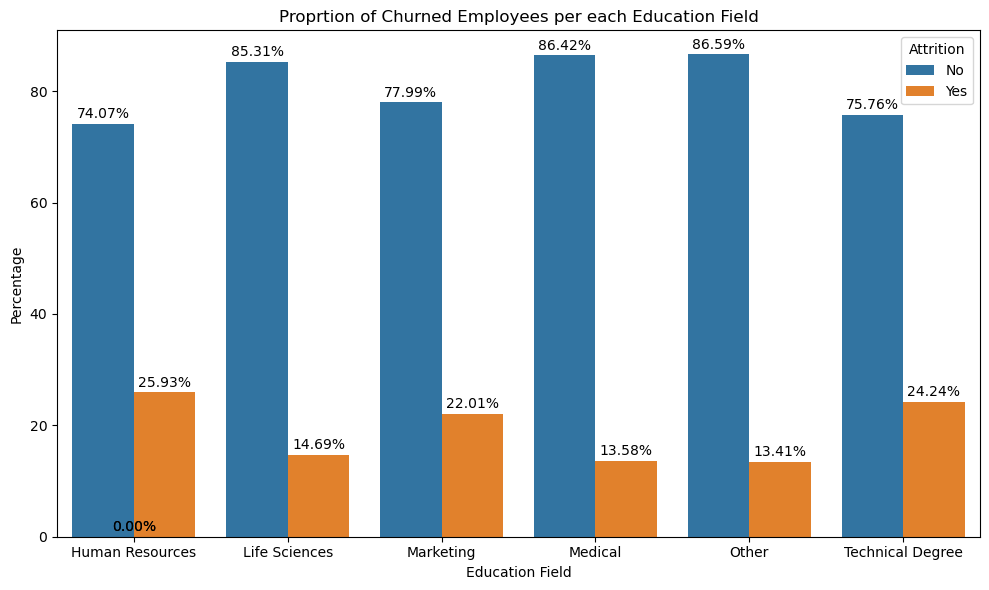

In [14]:
# Getting the percentage data
education_field_perc = get_perc_data(data, 'EducationField')

# # Plotting the frequency of each value for the churned employees using Plotly
# fig = px.bar(
#     education_field_perc,
#     x='EducationField',
#     y='Count',
#     color='Attrition',
#     text='Percentage',
#     hover_data={'Percentage': ':.2f'}
# ).update_layout(
#     title={
#         'text': 'Proprtion of Churned Employees per each Education Field',
#     },
#     yaxis_title='Count',
#     xaxis_title='Education Field'
# ).update_traces(
#     texttemplate='%{text:.2f}%',
# )

# fig.show()

# Plotting the frequency of each value for the churned employees using seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='EducationField',
    y='Percentage',
    hue='Attrition',
    data=education_field_perc
)

# Add percentage labels to the bars
for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = height + 0.5  # Adjust vertical position of label
    ax.text(x, y, f'{height:.2f}%', ha='center', va='bottom')

# Set title and labels
plt.title('Proprtion of Churned Employees per each Education Field')
plt.xlabel('Education Field')
plt.ylabel('Percentage')
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()

Looking at the plot, it is possible to notice that those employees whose graduations are from the HR, Marketing or Techincal Degree fields are much more likely to be churned employees.

## Environment Satisfaction

It is basically a common sense that: the better the work environment, the less likely it is for any employee to leave the company or to even join one. So we can assume that for lower levels of environment satisfaction the attrition rate is higher. Let's check it out.

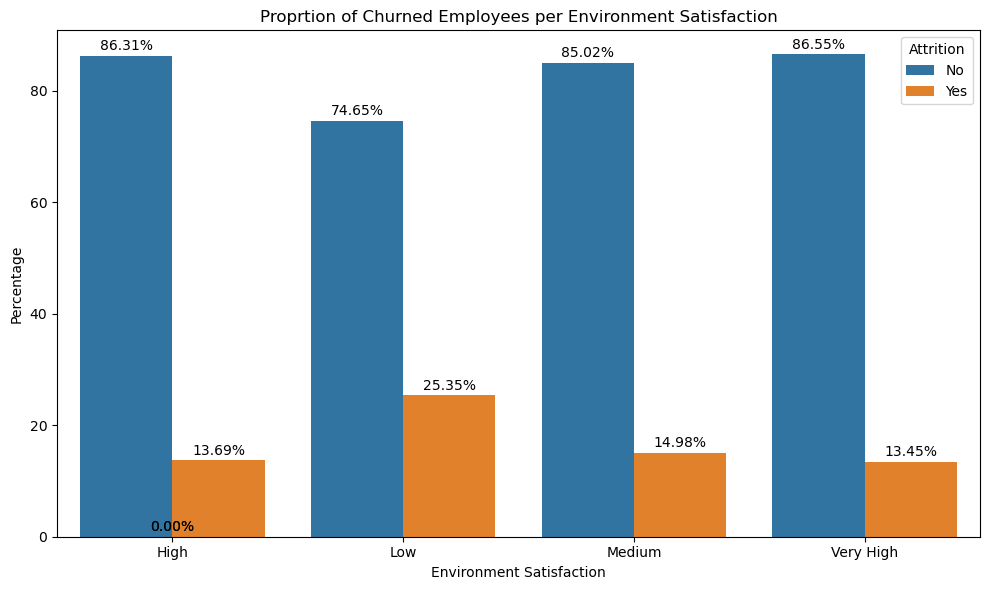

In [15]:
# Getting the percentage data
env_satisfaction_perc = get_perc_data(data, 'EnvironmentSatisfactionLabel')

# # Plotting the frequency of each value for the churned employees using Plotly
# fig = px.bar(
#     env_satisfaction_perc,
#     x='EnvironmentSatisfactionLabel',
#     y='Count',
#     color='Attrition',
#     text='Percentage',
#     hover_data={'Percentage': ':.2f'}
# ).update_layout(
#     title={
#         'text': 'Proprtion of Churned Employees per Environment Satisfaction',
#     },
#     yaxis_title='Count',
#     xaxis_title='Environment Satisfaction'
# ).update_traces(
#     texttemplate='%{text:.2f}%',
# )

# fig.show()

# Plotting the frequency of each value for the churned employees using seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='EnvironmentSatisfactionLabel',
    y='Percentage',
    hue='Attrition',
    data=env_satisfaction_perc
)

# Add percentage labels to the bars
for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = height + 0.5  # Adjust vertical position of label
    ax.text(x, y, f'{height:.2f}%', ha='center', va='bottom')

# Set title and labels
plt.title('Proprtion of Churned Employees per Environment Satisfaction')
plt.xlabel('Environment Satisfaction')
plt.ylabel('Percentage')
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()

As we thought: the lower the satisfaction, the higher the chances of leaving the company.

## Gender

Here comes a sensitive topic: wheter the employees gender influence somehow on the likeability of leaving the company, that is, if being a man or being a woman highers the probability of leaving the company.

The things is: if we actually find out that there are a significant imbalance, our future model will for sure be biased, because the data also is, which could mean a huge gender issue on the company or even something else totally different, but either way, we'll proceed with the model prediction regardless of the bias, for the sake of developing an accurate prediction model, but in real life, at a project on a company we're working at, we could probably take this situation back so we gather better data for a more accurate model development.

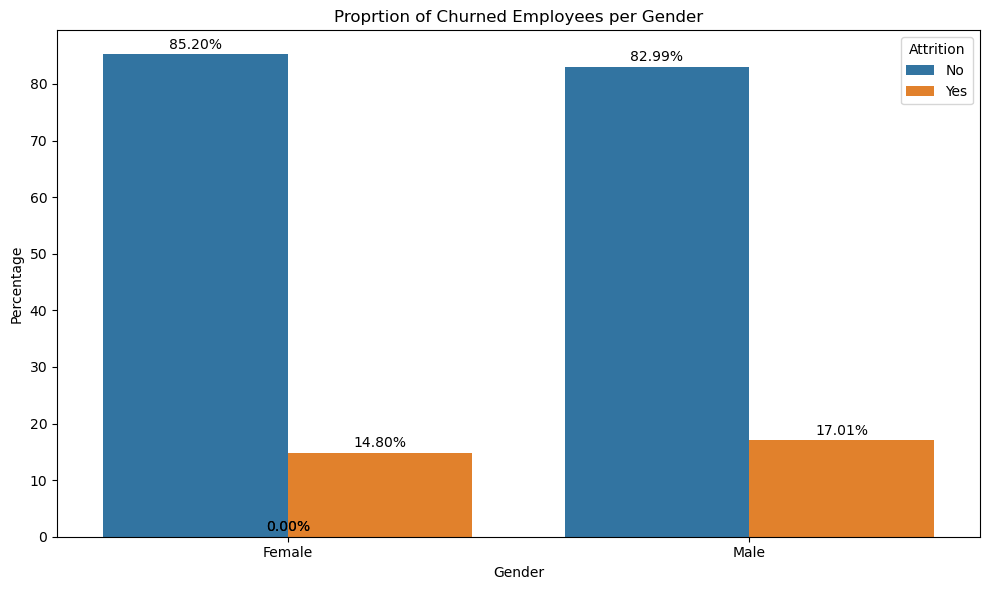

In [16]:
# Getting the percentage data
gender_perc = get_perc_data(data, 'Gender')

# # Plotting the frequency of each value for the churned employees using Plotly
# fig = px.bar(
#     gender_perc,
#     x='Gender',
#     y='Count',
#     color='Attrition',
#     text='Percentage',
#     hover_data={'Percentage': ':.2f'}
# ).update_layout(
#     title={
#         'text': 'Proprtion of Churned Employees per Gender',
#     },
#     yaxis_title='Count',
#     xaxis_title='Gender'
# ).update_traces(
#     texttemplate='%{text:.2f}%',
# )

# fig.show()

# Plotting the frequency of each value for the churned employees using seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='Gender',
    y='Percentage',
    hue='Attrition',
    data=gender_perc
)

# Add percentage labels to the bars
for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = height + 0.5  # Adjust vertical position of label
    ax.text(x, y, f'{height:.2f}%', ha='center', va='bottom')

# Set title and labels
plt.title('Proprtion of Churned Employees per Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()

Here we have a close to 2% difference, which per se does not look like a big difference, but let's do a statiscal test to check wheter there is really a significant difference or not.

For the test, we're going to use the **two-proportion Z-test**.

In [17]:
# Getting the gender counts
gender_counts = data['Gender'].value_counts()
# Use .get() with default 0 if 'Male' is not present
n_men = gender_counts.get('Male', 0)
n_women = gender_counts.get('Female', 0)

# Getting number of attrited employees in each gender
attrited_men = data[(data['Gender'] == 'Male') & (
    data['Attrition'] == 'Yes')].shape[0]
attrited_women = data[(data['Gender'] == 'Female') &
                      (data['Attrition'] == 'Yes')].shape[0]

# --- Step 2: Checking if we have enough data ---
if n_men < 5 or n_women < 5 or attrited_men < 5 or attrited_women < 5:
    print("Warning: Insufficient data in one or more gender or attrition groups. Results may be unreliable.")
else:
    # --- Step 3: Calculating the proportions (optional, but good for context) ---
    prop_men = attrited_men / n_men
    prop_women = attrited_women / n_women
    print(f"Attrition Rate (Men): {prop_men:.4f} ({prop_men*100:.2f}%)")
    print(f"Attrition Rate (Women): {prop_women:.4f} ({prop_women*100:.2f}%)")
    print(
        f"Difference: {prop_men - prop_women:.4f} ({(prop_men - prop_women)*100:.2f}%)")

    # --- Step 4: Performing the two-proportion Z-test ---
    # counts: number of successes (attritions) in each group
    counts = np.array([attrited_men, attrited_women])
    # nobs: total number of observations in each group
    nobs = np.array([n_men, n_women])

    # Perform the Z-test
    # alternative='two-sided' tests if the proportions are different
    # alternative='smaller' tests if prop_men < prop_women
    # alternative='larger' tests if prop_men > prop_women
    z_stat, p_value = proportions_ztest(counts, nobs, alternative='two-sided')

    # --- Step 5: Interpret the results ---
    alpha = 0.05  # Common significance level

    print("\n--- Two-Proportion Z-Test Results ---")
    print(f"Z-statistic: {z_stat:.4f}")
    print(f"P-value: {p_value:.4f}")
    print(f"Significance Level (alpha): {alpha}")

    if p_value < alpha:
        print(
            f"\nSince p-value ({p_value:.4f}) is less than alpha ({alpha}), we reject the null hypothesis.")
        print("There is a statistically significant difference in the attrition rate between genders.")
    else:
        print(
            f"\nSince p-value ({p_value:.4f}) is greater than or equal to alpha ({alpha}), we fail to reject the null hypothesis.")
        print("There is not enough evidence to suggest a statistically significant difference in the attrition rate between genders.")

Attrition Rate (Men): 0.1701 (17.01%)
Attrition Rate (Women): 0.1480 (14.80%)
Difference: 0.0221 (2.21%)

--- Two-Proportion Z-Test Results ---
Z-statistic: 1.1293
P-value: 0.2588
Significance Level (alpha): 0.05

Since p-value (0.2588) is greater than or equal to alpha (0.05), we fail to reject the null hypothesis.
There is not enough evidence to suggest a statistically significant difference in the attrition rate between genders.


As we concluded that there are no evidence of attrition difference, we can have no worries about gender bias on our data. Let's keep moving on.

## Job Involvement

We can assume that if someone is really involved on the job they're taking, there is a lower chance that they will leave the company at some point, because job involvement is related to how satisfied you are at your job, that is, the more satisfied you are, the more you try to do something at work, which would lead us to the same conclusions about environment satisfaction. Let's check it out.

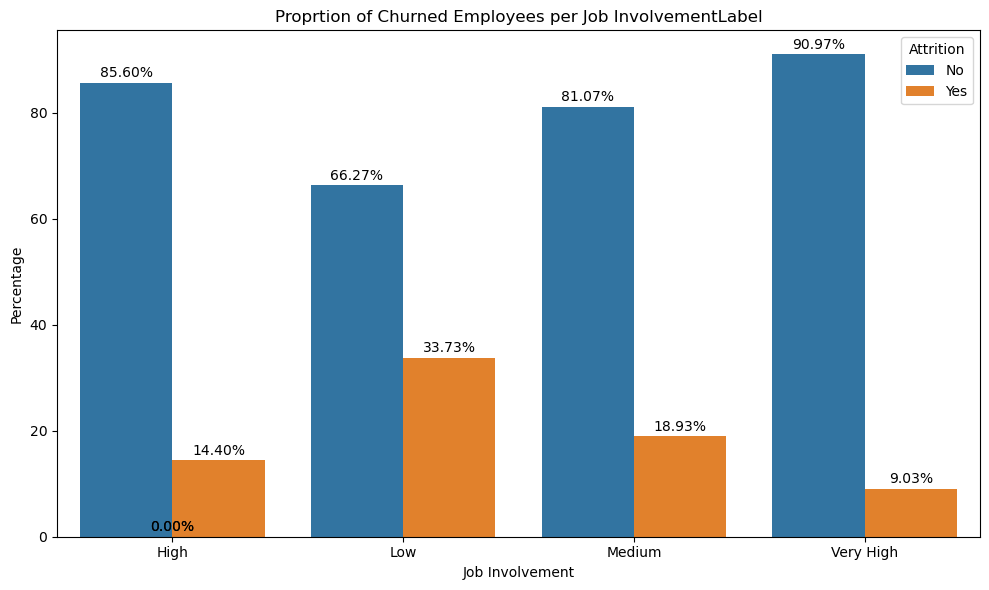

In [18]:
# Getting the percentage data
job_involvement_perc = get_perc_data(data, 'JobInvolvementLabel')

# # Plotting the frequency of each value for the churned employees using Plotly
# fig = px.bar(
#     job_involvement_perc,
#     x='JobInvolvementLabel',
#     y='Count',
#     color='Attrition',
#     text='Percentage',
#     hover_data={'Percentage': ':.2f'}
# ).update_layout(
#     title={
#         'text': 'Proprtion of Churned Employees per Job Involvement',
#     },
#     yaxis_title='Count',
#     xaxis_title='Job Involvement'
# ).update_traces(
#     texttemplate='%{text:.2f}%',
# )

# fig.show()

# Plotting the frequency of each value for the churned employees using seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='JobInvolvementLabel',
    y='Percentage',
    hue='Attrition',
    data=job_involvement_perc
)

# Add percentage labels to the bars
for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = height + 0.5  # Adjust vertical position of label
    ax.text(x, y, f'{height:.2f}%', ha='center', va='bottom')

# Set title and labels
plt.title('Proprtion of Churned Employees per Job InvolvementLabel')
plt.xlabel('Job Involvement')
plt.ylabel('Percentage')
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()

As we thought, the behavior for the job involvement is the same for environment satisfaction: the higher it is, the less likely the employee is to leave the company.

## Job Satisfaction

Here we come again with satisfaction, now about the job. We can have a scenario in which an employee is really satisfied with the environment, but not with the job, and vice-versa. But considering the job involvement is more related with the job satisfaction than environment satisfaction, we expect the same behavior as we have seen before.

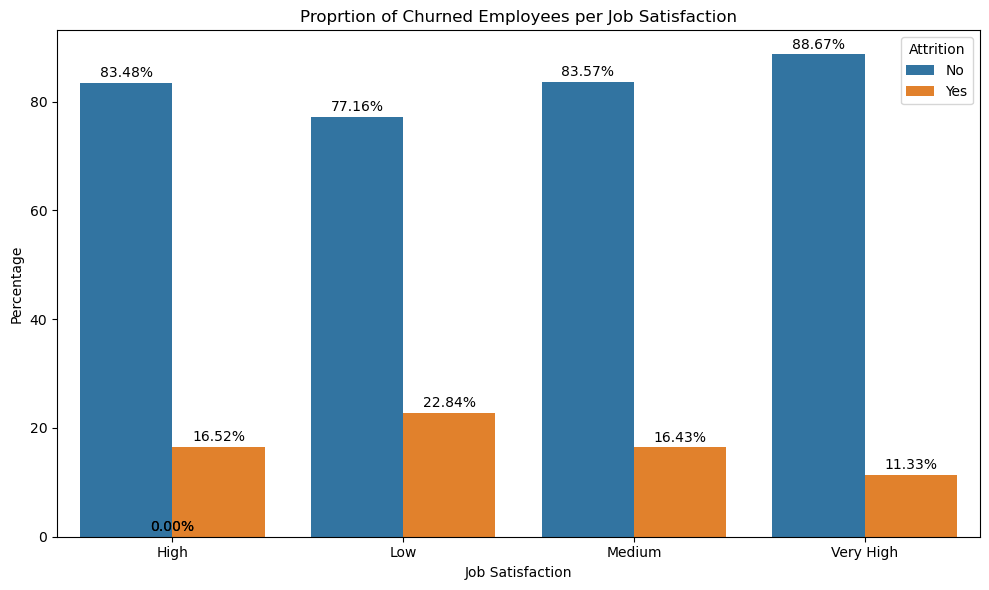

In [19]:
# Getting the percentage data
job_satisfaction_perc = get_perc_data(data, 'JobSatisfactionLabel')

# # Plotting the frequency of each value for the churned employees using Plotly
# fig = px.bar(
#     job_satisfaction_perc,
#     x='JobSatisfactionLabel',
#     y='Count',
#     color='Attrition',
#     text='Percentage',
#     hover_data={'Percentage': ':.2f'}
# ).update_layout(
#     title={
#         'text': 'Proprtion of Churned Employees per Job Satisfaction',
#     },
#     yaxis_title='Count',
#     xaxis_title='Job Satisfaction'
# ).update_traces(
#     texttemplate='%{text:.2f}%',
# )

# fig.show()

# Plotting the frequency of each value for the churned employees using seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='JobSatisfactionLabel',
    y='Percentage',
    hue='Attrition',
    data=job_satisfaction_perc
)

# Add percentage labels to the bars
for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = height + 0.5  # Adjust vertical position of label
    ax.text(x, y, f'{height:.2f}%', ha='center', va='bottom')

# Set title and labels
plt.title('Proprtion of Churned Employees per Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Percentage')
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()

And again, the same behavior: the higher the satisfaction, the lower the probability of leaving the company.

## Performace Rating

At every company we can find a kind of rule: if you are no performing well, you will leave the company. Of course, the level of performance can be related to environment satisfaction, the actual skills of the employee, the job satisfaction, and other factors. So let's check how it is related to the job attrition.

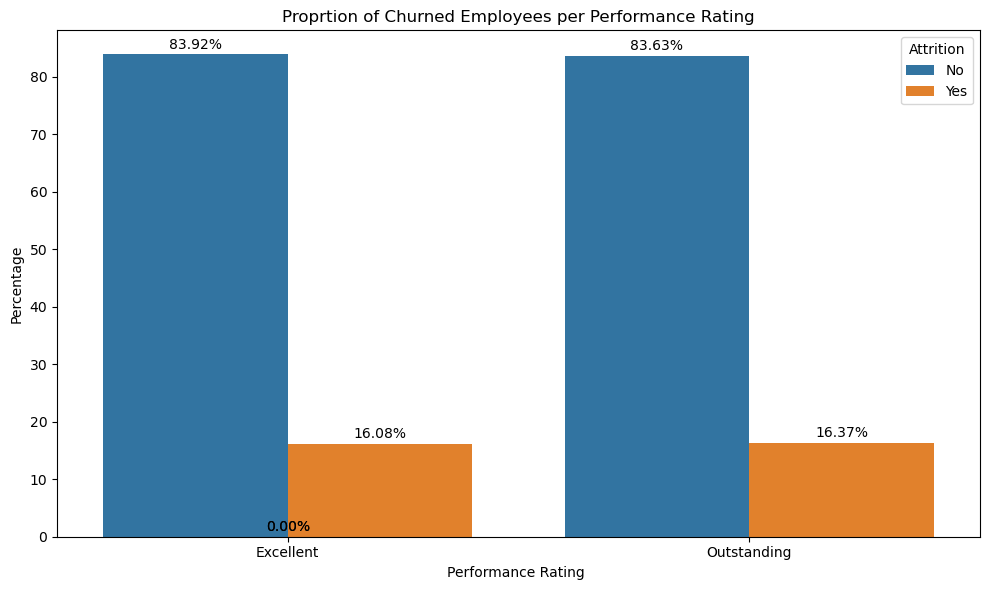

In [20]:
# Getting the percentage data
perf_rating_perc = get_perc_data(data, 'PerformanceRatingLabel')

# # Plotting the frequency of each value for the churned employees using Plotly
# fig = px.bar(
#     perf_rating_perc,
#     x='PerformanceRatingLabel',
#     y='Count',
#     color='Attrition',
#     text='Percentage',
#     hover_data={'Percentage': ':.2f'}
# ).update_layout(
#     title={
#         'text': 'Proprtion of Churned Employees per Performance Rating',
#     },
#     yaxis_title='Count',
#     xaxis_title='Performance Rating'
# ).update_traces(
#     texttemplate='%{text:.2f}%',
# )

# fig.show()

# Plotting the frequency of each value for the churned employees using seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='PerformanceRatingLabel',
    y='Percentage',
    hue='Attrition',
    data=perf_rating_perc
)

# Add percentage labels to the bars
for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = height + 0.5  # Adjust vertical position of label
    ax.text(x, y, f'{height:.2f}%', ha='center', va='bottom')

# Set title and labels
plt.title('Proprtion of Churned Employees per Performance Rating')
plt.xlabel('Performance Rating ')
plt.ylabel('Percentage')
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()

We can see and conclude a few things. First, the employees perform really well at the company, which is great, and also the difference between the attrition rates is really small, almost 0. Second, we can conclude that, even when they're performing well, the reason for leaving is really not related to how well the employee performs at the company.

## Relationship Satisfaction

The relationship that an employee has can affect greatly wheter they're going to leave a company or not, because this can involve external factors that lead to leaving where they actually are, for example, someone that is not feeling well at their relationship can be affected by it and therefore take a decision of leaving.

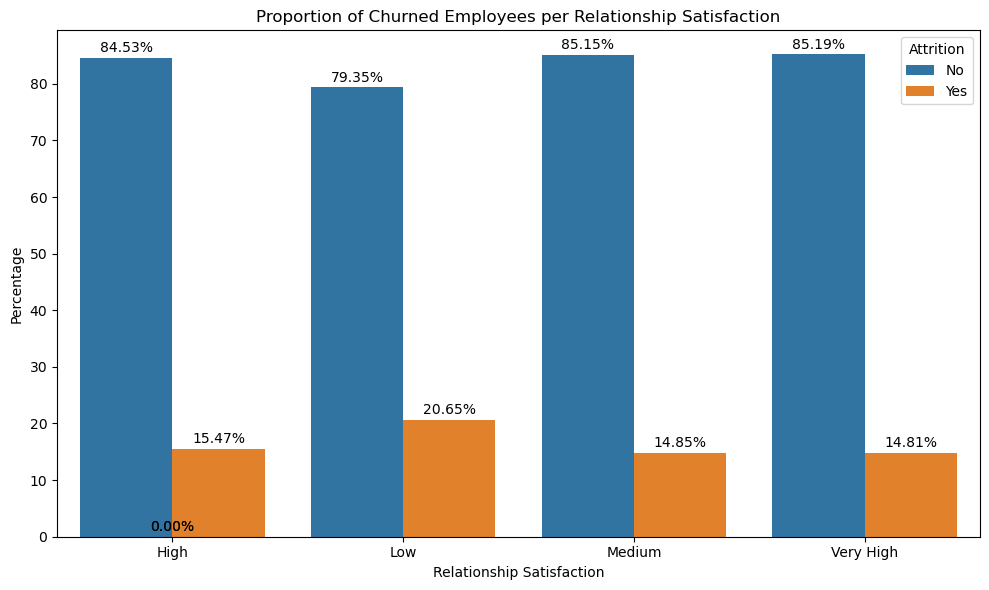

In [21]:
# Getting the percentage data
relationship_satisfaction_perc = get_perc_data(
    data, 'RelationshipSatisfactionLabel')

# # Plotting the frequency of each value for the churned employees using Plotly
# fig = px.bar(
#     relationship_satisfaction_perc,
#     x='RelationshipSatisfactionLabel',
#     y='Count',
#     color='Attrition',
#     text='Percentage',
#     hover_data={'Percentage': ':.2f'}
# ).update_layout(
#     title={
#         'text': 'Proprtion of Churned Employees per Relationship Satisfaction',
#     },
#     yaxis_title='Count',
#     xaxis_title='Relationship Satisfaction'
# ).update_traces(
#     texttemplate='%{text:.2f}%',
# )

# fig.show()

# Plotting the frequency of each value for the churned employees using seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='RelationshipSatisfactionLabel',
    y='Percentage',
    hue='Attrition',
    data=relationship_satisfaction_perc
)

# Add percentage labels to the bars
for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = height + 0.5  # Adjust vertical position of label
    ax.text(x, y, f'{height:.2f}%', ha='center', va='bottom')

# Set title and labels
plt.title('Proportion of Churned Employees per Relationship Satisfaction')
plt.xlabel('Relationship Satisfaction')
plt.ylabel('Percentage')
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()

as we thought, the employees with a lower relationship satisfaction tend to leave the company, as it is an external factor that plays a big role in a persons life decisions, which includes work.

## Work-Life Balance

Another factor that pplays a big role on wheter an employee is going to leave or not a company is how well balanced is the employees work-life ralationship. We can argue that, if an employee has not good work-life balance, the higher are the chances of them leaving the company. Let's check this hyposthesis out.

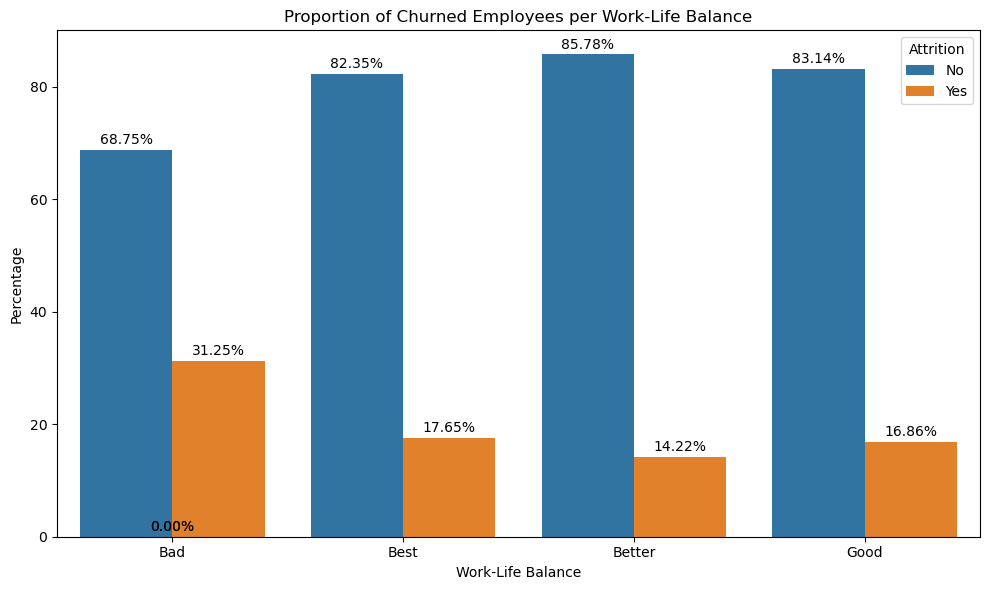

In [22]:
# Getting the percentage data
worklife_balance_perc = get_perc_data(data, 'WorkLifeBalanceLabel')

# # Plotting the frequency of each value for the churned employees using Plotly
# fig = px.bar(
#     worklife_balance_perc,
#     x='WorkLifeBalanceLabel',
#     y='Count',
#     color='Attrition',
#     text='Percentage',
#     hover_data={'Percentage': ':.2f'}
# ).update_layout(
#     title={
#         'text': 'Proprtion of Churned Employees per Work-Life Balance',
#     },
#     yaxis_title='Count',
#     xaxis_title='Work-Life Balance'
# ).update_traces(
#     texttemplate='%{text:.2f}%',
# )

# fig.show()

# Plotting the frequency of each value for the churned employees using seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='WorkLifeBalanceLabel',
    y='Percentage',
    hue='Attrition',
    data=worklife_balance_perc
)

# Add percentage labels to the bars
for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = height + 0.5  # Adjust vertical position of label
    ax.text(x, y, f'{height:.2f}%', ha='center', va='bottom')

# Set title and labels
plt.title('Proportion of Churned Employees per Work-Life Balance')
plt.xlabel('Work-Life Balance')
plt.ylabel('Percentage')
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()

As expected, the lower the work-life balance, the higher the chance is of an employee leaving the company. We can understand that by thinking this way: if you can't balance well your work and life, it will cause more stress, which will lead to a not being able to handle well all things to be done either in life or work, and then you are more prone to leave the company you're working at.

## Job Role

We could argue that, depending on the job role, due to the role's reposibilities, amount of work, or even kind of actions needed for that role, it is more likely that an employee will leave the company. Let's check this out.

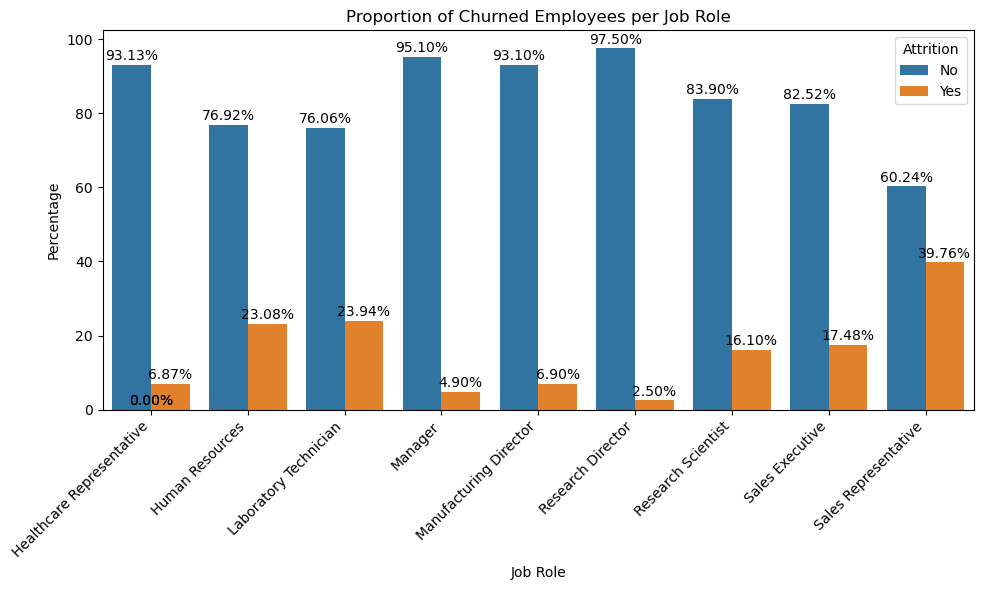

In [23]:
# Getting the percentage data
job_role_perc = get_perc_data(data, 'JobRole')

# # Plotting the frequency of each value for the churned employees using Plotly
# fig = px.bar(
#     job_role_perc,
#     x='JobRole',
#     y='Count',
#     color='Attrition',
#     text='Percentage',
#     hover_data={'Percentage': ':.2f'}
# ).update_layout(
#     title={
#         'text': 'Proprtion of Churned Employees per Job Role',
#     },
#     yaxis_title='Count',
#     xaxis_title='Job Role'
# ).update_traces(
#     texttemplate='%{text:.2f}%',
# )

# fig.show()

# Plotting the frequency of each value for the churned employees using seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='JobRole',
    y='Percentage',
    hue='Attrition',
    data=job_role_perc
)

# Add percentage labels to the bars
for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = height + 0.5  # Adjust vertical position of label
    ax.text(x, y, f'{height:.2f}%', ha='center', va='bottom')

# Set title and labels
plt.title('Proportion of Churned Employees per Job Role')
plt.xlabel('Job Role')
plt.ylabel('Percentage')
plt.legend(title='Attrition')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

We can see that Sales Representatives have a higher churn rate compared to other, followed by HR and Lab Technician. We can see that roles that occupy a higher position at the company have a lower churn rate.

## Over Time

Working over time can grant you a good image, an image of a dedicated employee and someone that does what is possible to get the work done, a hard-woker. But it can also be the reason of more and more stress at work, which will lead to a lot of bad effects, which includes company churn. Let's check the churn rate for those who work over time compared to those who doesn't.

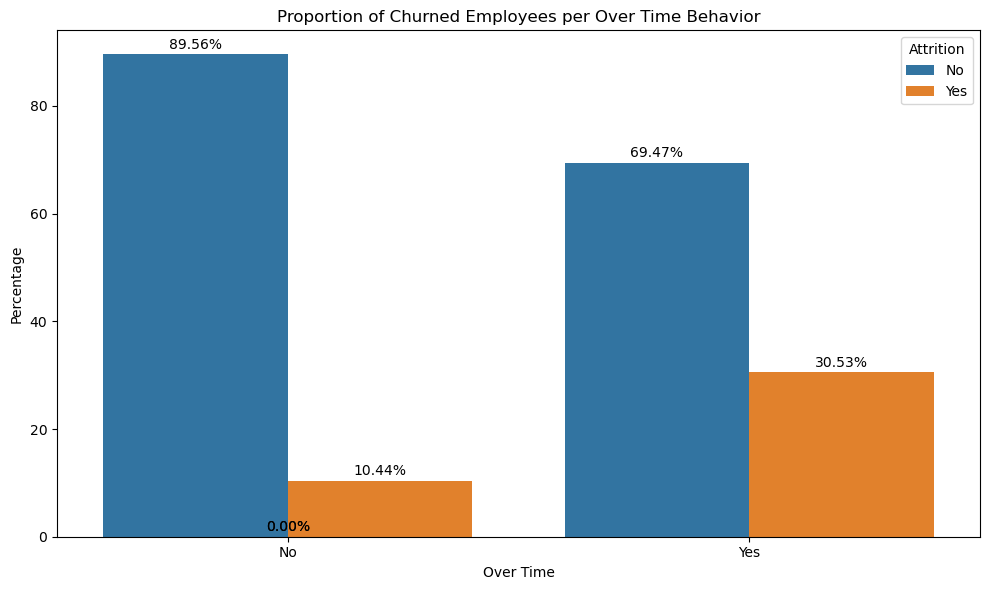

In [24]:
# Getting the percentage data
overtime_perc = get_perc_data(data, 'OverTime')

# # Plotting the frequency of each value for the churned employees using Plotly
# fig = px.bar(
#     overtime_perc,
#     x='OverTime',
#     y='Count',
#     color='Attrition',
#     text='Percentage',
#     hover_data={'Percentage': ':.2f'}
# ).update_layout(
#     title={
#         'text': 'Proprtion of Churned Employees per Over Time Behavior',
#     },
#     yaxis_title='Count',
#     xaxis_title='Over Time'
# ).update_traces(
#     texttemplate='%{text:.2f}%',
# )

# fig.show()

# Plotting the frequency of each value for the churned employees using seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='OverTime',
    y='Percentage',
    hue='Attrition',
    data=overtime_perc
)

# Add percentage labels to the bars
for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = height + 0.5  # Adjust vertical position of label
    ax.text(x, y, f'{height:.2f}%', ha='center', va='bottom')

# Set title and labels
plt.title('Proportion of Churned Employees per Over Time Behavior')
plt.xlabel('Over Time')
plt.ylabel('Percentage')
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()

As expected, those that do work over time have a higher chance of leaving the company.

## Marital Stauts

Wheter someone is single, married or divorced might not matter for the fact of churning, but think with me: depending on the marital status, a person can behave differently and even take different decisions at work, so we might find some correlation with the company's churn.

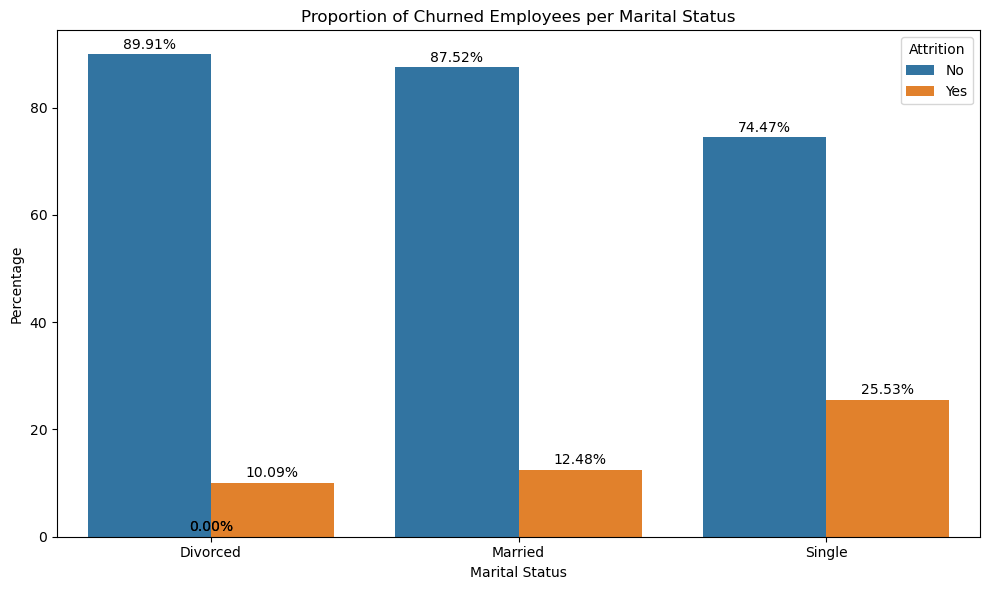

In [25]:
# Getting the percentage data
marital_status_perc = get_perc_data(data, 'MaritalStatus')

# # Plotting the frequency of each value for the churned employees using Plotly
# fig = px.bar(
#     marital_status_perc,
#     x='MaritalStatus',
#     y='Count',
#     color='Attrition',
#     text='Percentage',
#     hover_data={'Percentage': ':.2f'}
# ).update_layout(
#     title={
#         'text': 'Proprtion of Churned Employees per Marital Status',
#     },
#     yaxis_title='Count',
#     xaxis_title='Marital Status'
# ).update_traces(
#     texttemplate='%{text:.2f}%',
# )

# fig.show()

# Plotting the frequency of each value for the churned employees using seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='MaritalStatus',
    y='Percentage',
    hue='Attrition',
    data=marital_status_perc
)

# Add percentage labels to the bars
for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = height + 0.5  # Adjust vertical position of label
    ax.text(x, y, f'{height:.2f}%', ha='center', va='bottom')

# Set title and labels
plt.title('Proportion of Churned Employees per Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Percentage')
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()

As we can see, employees who are single have a much higher churn rate than those who are married or divorced. We can argue that the reason for such is due to the fact that, compared to the other two groups, they probably do not have any or as many dependents of them, that is, family members that they need to support, and so that affects work behavior, in the case which married and divorced either tend to not leave even when they're in a non-healthy work evironment or they can also deliver more results, thinking about being the support for their family.

Now, time to check how related are the numerical values to the target value: churn.

# Analyzing Numerical Data

In [ ]:
# Extracting the numerical variables

data['AttritionNum'] = np.where(data['Attrition'] == 'Yes',
                                1,
                                0).astype('int64')

numeric_cols = data[['Age', 'DailyRate', 'DistanceFromHome',
                     'HourlyRate', 'JobLevel',
                     'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
                     'PercentSalaryHike',
                     'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
                     'YearsAtCompany', 'YearsInCurrentRole',
                     'YearsSinceLastPromotion', 'YearsWithCurrManager']].columns
print(numeric_cols)

Index(['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'JobLevel',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


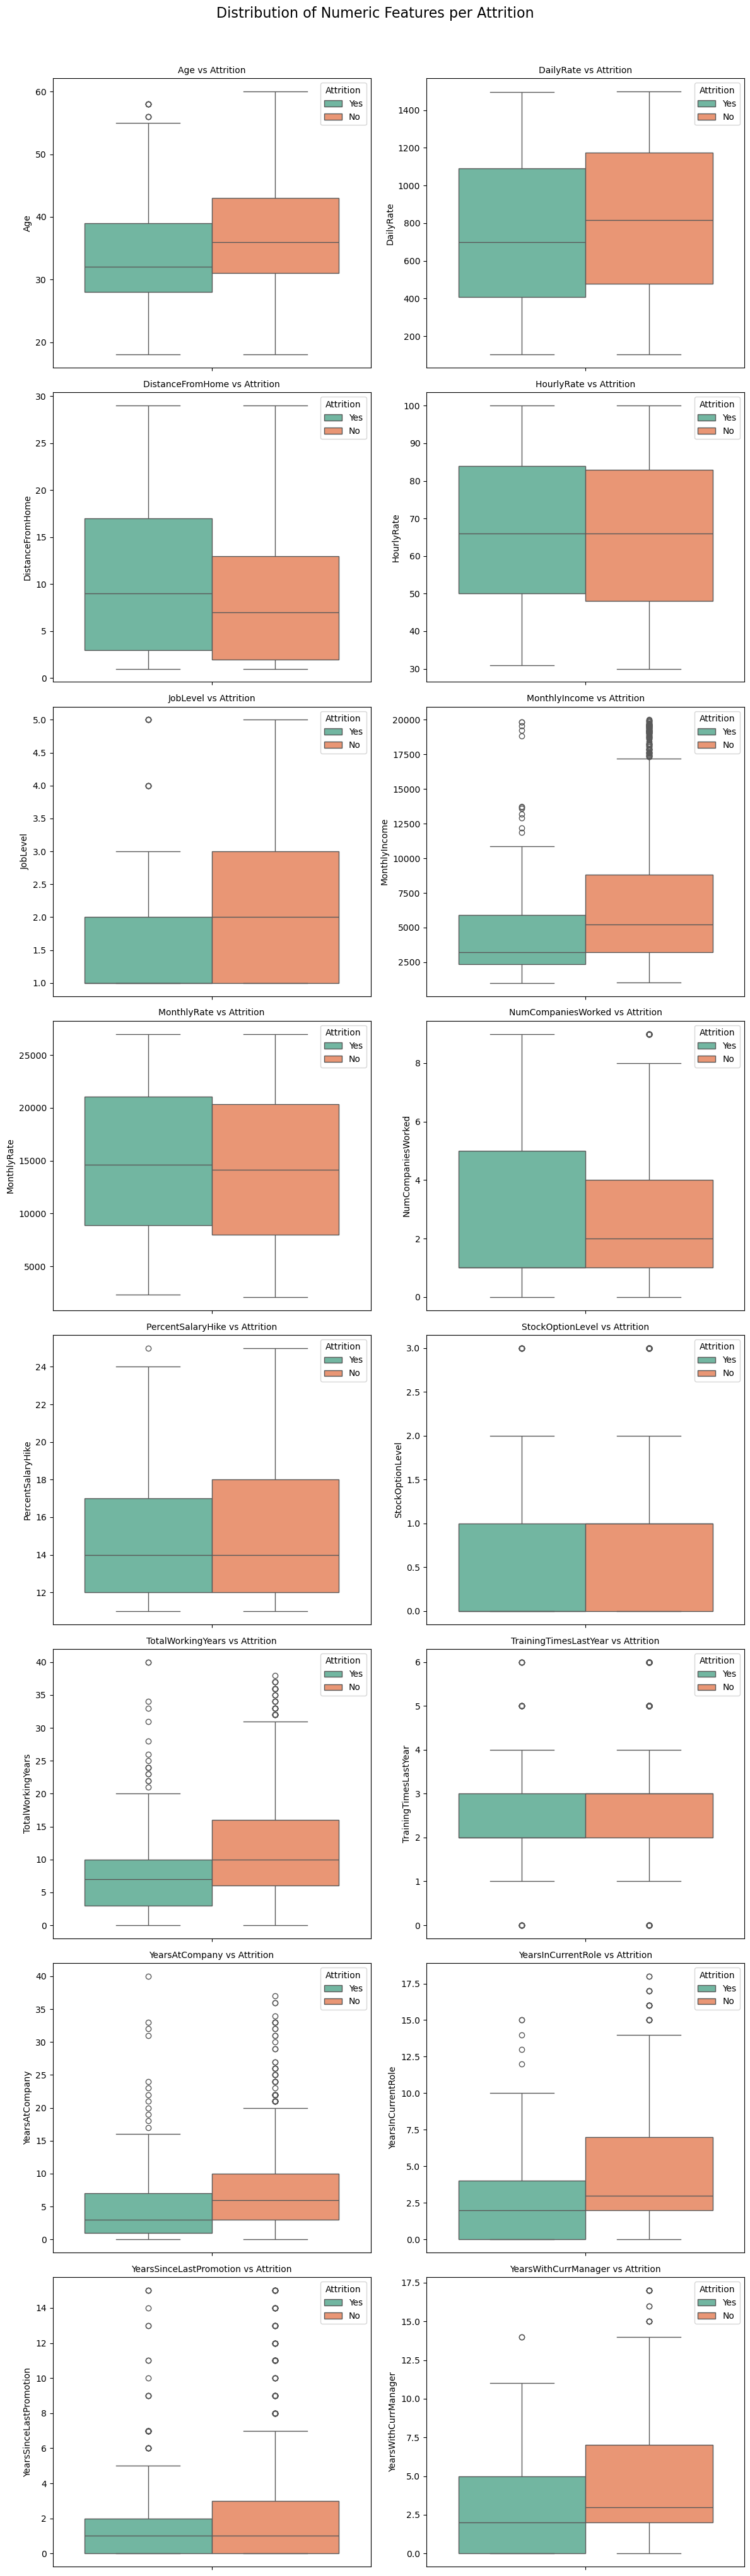

In [ ]:
# plotting a boxplot of each numeric feature

# grid options
n_cols = 2  # número de gráficos por linha
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

# Plotly
# # Creating subplots
# fig = make_subplots(rows=n_rows, cols=n_cols, subplot_titles=[f"{col}" for col in numeric_cols])

# # Optional colors
# color_map = {'Yes': 'lightblue', 'No': 'salmon'}

# # Adding the boxplots to each subplot
# for i, col in enumerate(numeric_cols):
#     row = i // n_cols + 1
#     col_pos = i % n_cols + 1

#     for attrition_value in data['Attrition'].unique():
#         filtered = data[data['Attrition'] == attrition_value]
#         fig.add_trace(
#             go.Box(
#                 y=filtered[col],
#                 name=attrition_value,
#                 marker_color=color_map[attrition_value],
#                 boxmean='sd',
#                 legendgroup=attrition_value,
#                 showlegend=(i == 0)
#             ),
#             row=row,
#             col=col_pos
#         )

# # Layout
# fig.update_layout(
#     height=350 * n_rows,
#     width=1200,
#     title_text='Distribution of Numeric Features per Attrition',
#     title_x=0.5,
#     boxmode='group'
# )

# fig.show()

# Seaborn
plt.figure(figsize=(n_cols * 6, n_rows * 5))

for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    # different collors for Yes/No
    sns.boxplot(data=data, hue='Attrition', y=col, palette="Set2")
    plt.title(f'{col} vs Attrition', fontsize=10)
    plt.xlabel('')
    plt.tight_layout()

plt.suptitle('Distribution of Numeric Features per Attrition',
             fontsize=16, y=1.02)
plt.show()

We can notice from the plots above that:
- The younger employees are more prone to churn;
- Even though there's a small difference, those employees with a lower daily rate are more prone to churn;
- The farther the employee is from their home, the more they're likely to leave the company;
- The hourly rate have almost no influence on the churn rate, behavior observed also for monthly rate, stock option level and amount of training times on the last year;
- The lower the job level, the higher the chances of churn;
- The lower the monthly income, the more likely it is for the employee to leave the company;
- The employees that worked at more companies are more prone to churn;
- Those with a lower salary percentage hike are more likely to churn;
- Employees that are working for a longer time are less likely to leave the company, behavior also seen for employees that are working for the company for a longer time, that are in the current role for a longer period, that are working under the same manager for a longer time and also those that are a longer time without a promotion;

In [ ]:
# printing the correlations with Attrition to confirm the conclusions
correlations = data[numeric_cols].corrwith(
    data['AttritionNum']).sort_values(ascending=False)
print(correlations)

DistanceFromHome           0.077924
NumCompaniesWorked         0.043494
MonthlyRate                0.015170
HourlyRate                -0.006846
PercentSalaryHike         -0.013478
YearsSinceLastPromotion   -0.033019
DailyRate                 -0.056652
TrainingTimesLastYear     -0.059478
YearsAtCompany            -0.134392
StockOptionLevel          -0.137145
YearsWithCurrManager      -0.156199
Age                       -0.159205
MonthlyIncome             -0.159840
YearsInCurrentRole        -0.160545
JobLevel                  -0.169105
TotalWorkingYears         -0.171063
dtype: float64


The values above confirms the conclusions we made.

For the predictive modeling, it is really important to check multicolinearity between the variables, because they can interfere negatively on our model, so let's check the multicolinearity between the numeric features.

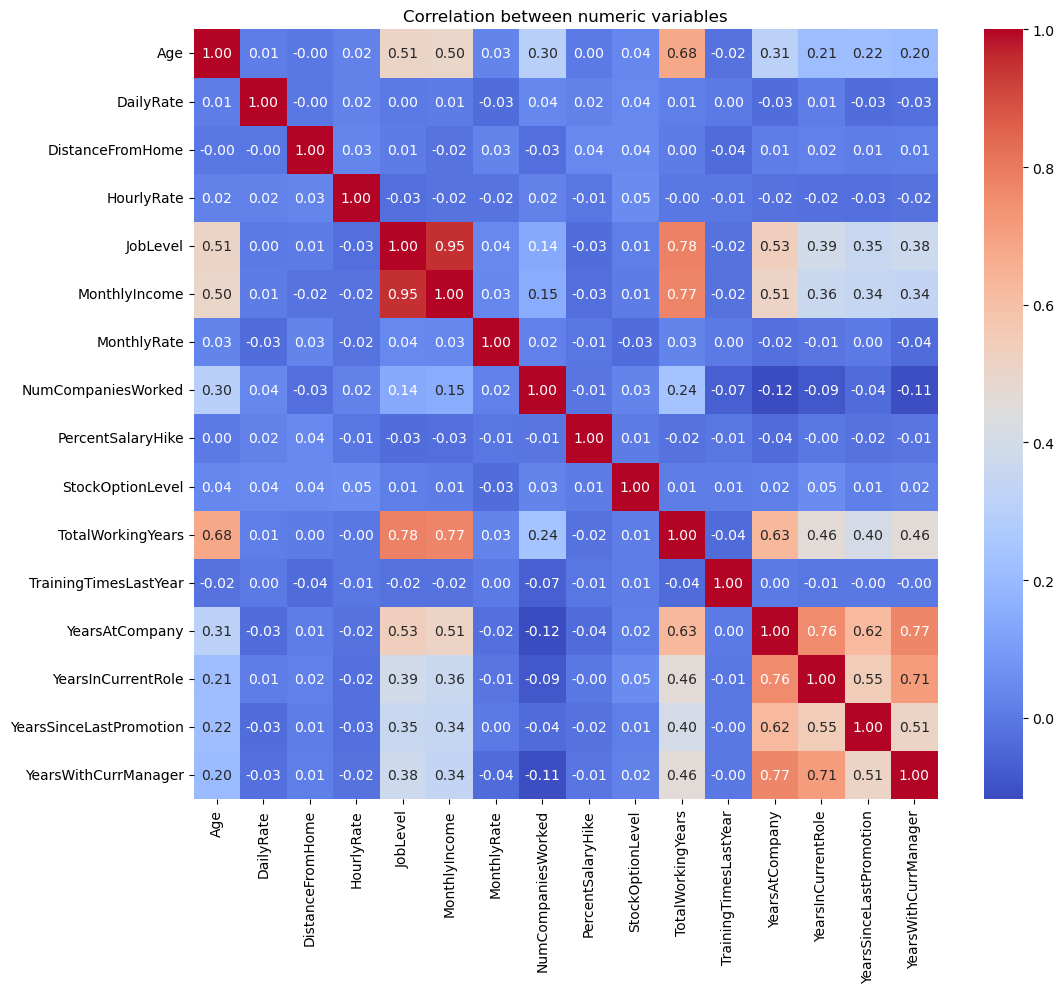

In [29]:
# plotting the multicolinearity heatmap

# # Using Plotly
# # Calculate the correlation matrix
# corr = data[numeric_cols].corr()

# # Create the Plotly heatmap
# fig = go.Figure(data=go.Heatmap(
#                    z=corr.values,
#                    x=corr.columns,
#                    y=corr.columns,
#                    colorscale='Viridis',
#                    text=np.round(corr.values, 2), # Display correlation values on heatmap
#                    texttemplate="%{text}",
#                    hoverinfo='text'))

# # Update layout for better appearance and title
# fig.update_layout(
#     title='Correlation between numeric variables',
#     xaxis_title='Variables',
#     yaxis_title='Variables',
#     xaxis_tickangle=-45, # Rotate x-axis labels if they overlap
#     margin=dict(l=50, r=50, t=80, b=100) # Adjust margins as needed
# )

# # Show the plot
# fig.show()

# Using Seaborn
corr = data[numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation between numeric variables')
plt.show()

We can see a unique strong multicolinearity - considering a strong value anything greater than 0.85 or lower than -0.85 - happening with our data: between MonthlyIncome and JobLevel, which is totally understandable, because it's trivial to say that: the higher the job level, the higher the monthly pay.

Even though we're going to model our predictions using tree models, that are not directly affected by multicolinearity, we'll still use only one of these variables for the predictive in order to:
- Reduce complexity and noise;
- Better explainability;
- Avoid overfitting;

So now, let's start modeling our data. 

# Modeling the data

For our models, we're going to use and compare two boosting based tree models: LightGBM and CatBoost, both that deal really well with categorical variables, in a way that we don't need to one-hot-encode our categorical data: they're able to handle them perfectly.

For our models metric, we're to use the **recall** to evaluate them. Why? Because we have the following situation: it is really important to predict correctly wheter or not an employee is going to leave, because the company can lose great talents that way, as well as having a higher cost for hiring a new one. About predicting incorrectly that an employee will leave is not much of a problem: we can see that as an opportunity to create a better environment and motivate more our employee.

In [30]:
# Checking data imbalance

data['Attrition'].value_counts(normalize=True)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

In [33]:
# Separating the features and the target

cols_to_drop = ['Attrition', 'AttritionNum', 'Education',
                'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction',
                'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance'
                ]

features = data.drop(cols_to_drop, axis=1)
target = data['AttritionNum']

cat_features = ['BusinessTravel', 'Department', 'EducationField', 'EducationLabel', 'EnvironmentSatisfactionLabel',
                'JobInvolvementLabel', 'JobSatisfactionLabel', 'PerformanceRatingLabel',
                'RelationshipSatisfactionLabel', 'WorkLifeBalanceLabel', 'Gender',
                'MaritalStatus', 'JobRole', 'OverTime']

for col in cat_features:
    features[col] = features[col].astype('category')

# separating into train and test

train_features, test_features, train_target, test_target = train_test_split(
    features, target, test_size=.2, random_state=42, stratify=target
)

## LightGBM

In [ ]:
# Opmtimizing for recall of the positive class
recall_scorer = make_scorer(recall_score, pos_label=1)

lgbm = LGBMClassifier(random_state=42, class_weight={0: 1, 1: 5.7})

param_dist_lgbm = {
    'num_leaves': [20, 31, 40],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 300, 500],
    'max_depth': [-1, 5, 10],
    'min_child_samples': [10, 20, 30]
}

search_lgbm = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist_lgbm,
    n_iter=30,
    scoring=recall_scorer,
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

search_lgbm.fit(train_features, train_target)
print('Better parameters:', search_lgbm.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[LightGBM] [Info] Number of positive: 190, number of negative: 986
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000343 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1141
[LightGBM] [Info] Number of data points in the train set: 1176, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.523441 -> initscore=0.093834
[LightGBM] [Info] Start training from score 0.093834
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

## CatBoost

In [55]:
catboost = CatBoostClassifier(
    verbose=0,
    random_state=42,
    class_weights=[1, 6],
    cat_features=cat_features
)

param_dist_cb = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [200, 500],
    'l2_leaf_reg': [1, 3, 5, 7],
    'border_count': [32, 64, 128]
}

search_catboost = RandomizedSearchCV(
    estimator=catboost,
    param_distributions=param_dist_cb,
    n_iter=30,
    scoring=recall_scorer,
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

search_catboost.fit(train_features, train_target)
print('Best parameters:', search_catboost.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters: {'learning_rate': 0.01, 'l2_leaf_reg': 3, 'iterations': 500, 'depth': 4, 'border_count': 32}


In [ ]:
# Evaluatiog the models

print('------------------Evaluating the LightGBM model------------------')
lgbm_train_preds = search_lgbm.best_estimator_.predict(train_features)
lgbm_test_preds = search_lgbm.best_estimator_.predict(test_features)
print('Recall score for training data:',
      recall_score(train_target, lgbm_train_preds))
print('Recall score for test data:', recall_score(test_target, lgbm_test_preds))
print('\nConfusion matrix for train')
print(confusion_matrix(train_target, lgbm_train_preds))
print(classification_report(train_target,
      lgbm_train_preds, target_names=['No', 'Yes']))
print('\nConfusion matrix for test')
print(confusion_matrix(test_target, lgbm_test_preds))
print(classification_report(test_target,
      lgbm_test_preds, target_names=['No', 'Yes']))

print('\n')
print('------------------Evaluating the CatBoost model------------------')
cat_train_preds = search_catboost.best_estimator_.predict(train_features)
cat_test_preds = search_catboost.best_estimator_.predict(test_features)
print('Recall score for training data:',
      recall_score(train_target, cat_train_preds))
print('Recall score for test data:', recall_score(test_target, cat_test_preds))
print('\nConfusion matrix for train')
print(confusion_matrix(train_target, cat_train_preds))
print(classification_report(train_target,
      cat_train_preds, target_names=['No', 'Yes']))
print('\nConfusion matrix for test')
print(confusion_matrix(test_target, cat_test_preds))
print(classification_report(test_target,
      cat_test_preds, target_names=['No', 'Yes']))

------------------Evaluating the LightGBM model------------------
Recall score for training data: 0.8421052631578947
Recall score for test data: 0.5106382978723404

Confusion matrix for train
[[828 158]
 [ 30 160]]
              precision    recall  f1-score   support

          No       0.97      0.84      0.90       986
         Yes       0.50      0.84      0.63       190

    accuracy                           0.84      1176
   macro avg       0.73      0.84      0.76      1176
weighted avg       0.89      0.84      0.85      1176


Confusion matrix for test
[[202  45]
 [ 23  24]]
              precision    recall  f1-score   support

          No       0.90      0.82      0.86       247
         Yes       0.35      0.51      0.41        47

    accuracy                           0.77       294
   macro avg       0.62      0.66      0.63       294
weighted avg       0.81      0.77      0.79       294



------------------Evaluating the CatBoost model------------------
Recall score 

From the results above, we can clearly tell that the CatBoost model is performing much better. But we have an amount of overfitting on our data: a score of 0.85 recall on training data for a 0.74 recall on test. This difference is enough for us to say that there's a small overfitting, but we have another thing: the amount of data is really small, so, because of that, even if we try to search for more and more parameters, we might not gain much more performance, concluding that we've reached a plateu on our model's perfomance. But, as we still got a good recall score considering the data we have, let's settle with it.

But, for our better understanding of the model's choices in order to predict wheter an employee is leaving or not the company, let's check the feature importance information of our model.

                         Feature  Importance
9                        JobRole   11.698413
14                      OverTime   11.456848
16              StockOptionLevel    7.119561
0                            Age    5.665179
1                 BusinessTravel    5.146371
24  EnvironmentSatisfactionLabel    4.751445
22          YearsWithCurrManager    4.645839
26          JobSatisfactionLabel    4.387227
13            NumCompaniesWorked    4.278097
11                 MonthlyIncome    3.691483
29          WorkLifeBalanceLabel    3.577754
19                YearsAtCompany    3.471625
25           JobInvolvementLabel    3.301962
3                     Department    3.251811
8                       JobLevel    2.735831
17             TotalWorkingYears    2.624521
4               DistanceFromHome    2.497442
10                 MaritalStatus    2.386019
2                      DailyRate    2.108543
20            YearsInCurrentRole    1.902458


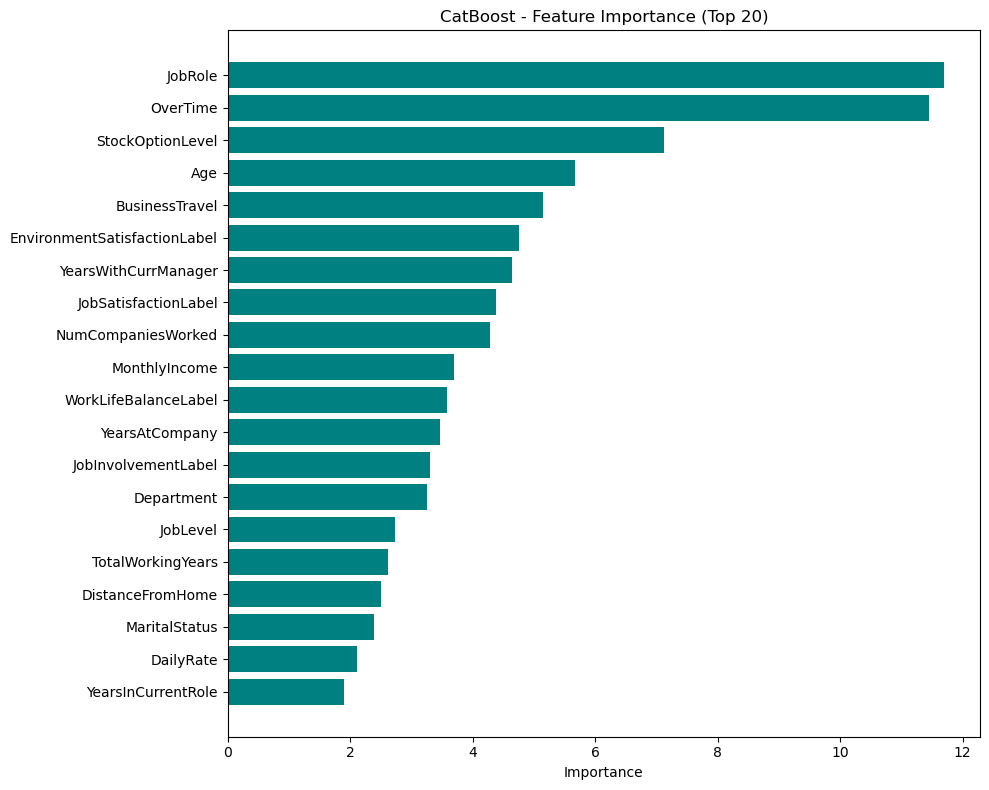

In [ ]:
# Getting the feature importance
best_catboost = search_catboost.best_estimator_
feature_names = train_features.columns

importances = best_catboost.get_feature_importance()
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# checking the top 20
print(feature_importance_df.head(20))

# visualizing the data
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'][:20][::-1],
         feature_importance_df['Importance'][:20][::-1], color='teal')
plt.xlabel('Importance')
plt.title('CatBoost - Feature Importance (Top 20)')
plt.tight_layout()
plt.show()

Looking at the bar chart above, we can conclude that **JobRole**, **OverTime** and **StockOptionLevel** are the ones that contribute the most for the model's error reduction. But, looking at the last one, and looking back to its boxplot we might think: why this feature helps explain when its value per se does not generate any useful information on wheter an employee is leaving or not ? We explain that by the fact that this feature might have an interactive effect with other features or it has non-linear patterns that are not evident with the boxplot only.

# Conclusion

This project aimed to analyze employee attrition within a company to better understand the underlying reasons for churn and develop a predictive model capable of identifying potential future attrition cases. Through exploratory data analysis, we identified key factors correlated with attrition, such as job role, overtime, stock option levels, and business travel frequency.

Using classification models such as LightGBM and CatBoost, we were able to train a model that shows promising performance in predicting whether an employee is likely to leave the company or not. These models, especially when tuned and evaluated with recall in mind, can be valuable tools for HR departments to proactively identify at-risk employees.

Beyond model performance, the project highlights the importance of data-driven decision-making in managing talent and improving workplace conditions. By understanding and acting upon the factors that drive attrition, companies can foster a more stable and engaging work environment.